# Importing modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf 
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.datasets import mnist

## Getting the dataset and diving into test and train

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Size of train and test set

In [3]:
print("X_train Shape", X_train.shape)
print("y_train Shape", y_train.shape)

X_train Shape (60000, 28, 28)
y_train Shape (60000,)


## Preprocessing the input data , reshaping to (28,28,1)

In [4]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

X_train.shape

(60000, 28, 28, 1)

In [5]:
class_total = 10
Y_train = tf.keras.utils.to_categorical(y_train, class_total)
Y_test = tf.keras.utils.to_categorical(y_test, class_total)

## Preprocessing Training set

In [6]:
train_gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)
train_set = train_gen.flow(X_train, Y_train, batch_size=64)


## Preprocessing Test set

In [7]:
test_gen = ImageDataGenerator()
test_set = test_gen.flow(X_test, Y_test, batch_size=64)

# Building the CNN

In [9]:
cnn = tf.keras.models.Sequential()

## Adding Hidden Layer 1

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size= 3, activation='relu', input_shape= [28,28,1]))

## MaxPooling Layers 1

In [11]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size= (2,2), strides = 2))

## Adding Hidden Layer 2 and MaxPooling layer 2

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size= 3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size= (2,2), strides = 2))

## Flattening

In [13]:
cnn.add(tf.keras.layers.Flatten())

## Fulling connected layer 1 with 120 nodes

In [14]:
cnn.add(tf.keras.layers.Dense(units = 120, activation = 'relu'))

## Fully connected Layer 2 with 84 nodes

In [15]:
cnn.add(tf.keras.layers.Dense(units = 84, activation = 'relu'))

## Output layer with 10 nodes

In [16]:
cnn.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))

In [17]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 120)               192120    
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

# Compiling the CNN

In [18]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [19]:
cnn.fit_generator(train_set, steps_per_epoch=60000/64, epochs=7, 
                    validation_data=test_set, validation_steps=10000/64)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/7
938/937 [==============================] - 27s 29ms/step - loss: 0.2614 - accuracy: 0.9174 - val_loss: 0.0535 - val_accuracy: 0.9835
Epoch 2/7
938/937 [==============================] - 29s 31ms/step - loss: 0.0885 - accuracy: 0.9728 - val_loss: 0.0328 - val_accuracy: 0.9887
Epoch 3/7
938/937 [==============================] - 30s 32ms/step - loss: 0.0645 - accuracy: 0.9797 - val_loss: 0.0304 - val_accuracy: 0.9904
Epoch 4/7
938/937 [==============================] - 30s 32ms/step - loss: 0.0530 - accuracy: 0.9836 - val_loss: 0.0324 - val_accuracy: 0.9881
Epoch 5/7
938/937 [==============================] - 29s 31ms/step - loss: 0.0470 - accuracy: 0.9853 - val_loss: 0.0271 - val_accuracy: 0.9908
Epoch 6/7
938/937 [==============================] - 29s 31ms/step - loss: 0.0432 - accuracy: 0.9864 - val_loss: 0.0207 - val_accuracy: 0.9940
Epoch 7/7
938/937 [==============================] - 30s 32ms/step

In [20]:
score = cnn.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0204 - accuracy: 0.9931

Test accuracy:  0.9930999875068665


## Serialize model to JSON 

In [21]:
model_json = cnn.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

## Serialize weights to HDF5

In [22]:
cnn.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


7


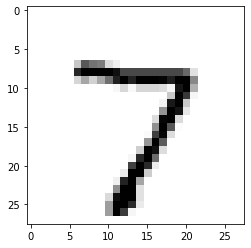

In [28]:
plt.imshow(X_test[0].reshape(28, 28),cmap='Greys')
pred = cnn.predict(X_test[0].reshape(1, 28, 28, 1))
print(pred.argmax())